In [0]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [0]:
# para gerar o grafico no browser
%matplotlib inline

In [6]:
!git clone http://github.com/ucfilho/ANN
%cd ANN
!ls

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
ANN
ann_aula_ago_14_2018_leitura_git.ipynb
ANN_aula_Scikit_learn _ago_29_2018.ipynb
ANN_Hydrofoil_ago_29_2018.txt.ipynb
ANN_Hydrofoil_Clean_02_set_12_2018.ipynb
ANN_Hydrofoil_Neuronicos_02__set_12_2018.ipynb
ANN_Hydrofoil_set_05_2018.ipynb
ANN_Hydrofoil_set_12_2018.ipynb
Aprendendo_Um_Pouco_mais_sobre_Python_set_05_2018.ipynb
arvore.jpg
Aula_003_Python_audio_e_imagem_ago_29_2018.ipynb
aula_04_rede_neural_set_05_2018.pdf
BBC_007041008.wav
Criando_Gethub_Ver_Youtube.txt
FAULT_DIAGNOSIS_maio_25_2017.txt
Hydrofoil_ago_29_2018.csv
john_mccarthy.png
Paper_Carvao_China_abril_12_2016.csv
Paper_Carvao_China_mar_31_2016.txt
README.md
simbolos.pdf
Video_mp4_Python_Notebook.ipynb


In [0]:
# leitura dos dados
DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [0]:
# separa as colunas de interesse
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=DAT.iloc[:,Index].copy()

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [0]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)

In [0]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [0]:
# obtem as variaveis dependentes (treino e teste)
Index=[2,3,4,5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [0]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8), 
                    random_state=1)

In [16]:
# treina a rede neural
clf.fit(x_train, y_train)

MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(9, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

In [0]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [0]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [0]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [0]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Resistence'].copy()
resist_obs_train=train['Resistence'].copy()

In [0]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Resistence'].copy()
resist_obs_test=test['Resistence'].copy()

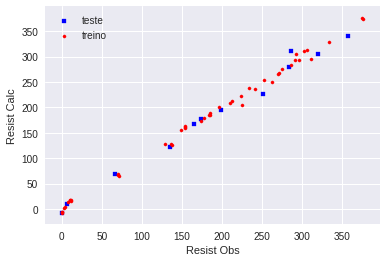

In [23]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Resist Calc')
plt.xlabel('Resist Obs')
plt.show()

In [24]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 171.70192086365068
R^2 teste= 0.9867634073615394


In [25]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 44.13446934122122
R^2 treino= 0.996523398605696
